# **Processamento de Imagens e Imagens**
Engenharia da Computação - 2021.01

**Wesley de Oliveira Mendes, 828.507**

## Tarefa 07 - Segmentação com Watershed
- Objetivo
    - Aplicar o algoritmo Watershed para segmentação de imagens.

### Download das imagens

In [173]:
!mkdir data >/dev/null 2>&1
!wget 'https://i.imgur.com/FFNbo7k.jpg' -O 'data/mosquito_aedes.jpg' >/dev/null 2>&1
!wget 'https://i.imgur.com/EG2siwh.jpg' -O 'data/piece_orange.jpg' >/dev/null 2>&1

### Imports

In [174]:
import math
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Code

#### Exercício 1

Faça uma pesquisa na internet de uma imagem de microscopia celular.

Você pode escolher a imagem da sua preferência.

Aplique o algoritmo de segmentação Watershed para realizar segmentação das células. Demonstre os resultados obtidos.

> Disponível em: <https://imagej.net/_images/8/83/NucleiDAPIconfocal.png>

In [175]:
exe1_img1 = cv.imread('data/mosquito_aedes.jpg')
exe1_img1 = cv.cvtColor(exe1_img1, cv.COLOR_BGR2RGB)

In [176]:
# transformar a imagem em preto/branco (binarizar)
exe1_img2 = cv.cvtColor(exe1_img1, cv.COLOR_RGB2GRAY)
th, exe1_img2 = cv.threshold(exe1_img2, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# Morfologia matemática
# Operacao de abertura
# Remove pequenos ruidos da imagem
kernel = np.ones((3, 3), np.uint8)  # Matriz 3x3 preenchida com o valor 1 (um)
exe1_img3 = cv.morphologyEx(exe1_img2, cv.MORPH_OPEN, kernel, iterations = 2)

# Operacao de dilatacao
# Preencher pequenos espacos na imagem
exe1_img4 = cv.dilate(exe1_img3, kernel, iterations=1)

exe1_img5 = cv.distanceTransform(exe1_img4, cv.DIST_L2, 5)
th, exe1_img6 = cv.threshold(exe1_img5, 0.20 * exe1_img5.max(), 255, 0)

# Procurar a regiao do watershed
exe1_img6 = np.uint8(exe1_img6)  # Converter a matriz de pixels de inteiros
exe1_img7 = cv.subtract(exe1_img4, exe1_img6)

# Rotular os componentes conectados da imagem
ret, rotulos = cv.connectedComponents(exe1_img6)
rotulos = rotulos + 1

# Marcar a regiao do watershed como o valor zero
rotulos[exe1_img7 == 255] = 0    # Pixels = 255 sao alterados para zero
exe1_img8 = cv.watershed(exe1_img1, rotulos)
exe1_img1[rotulos == -1] = [255, 0, 0]

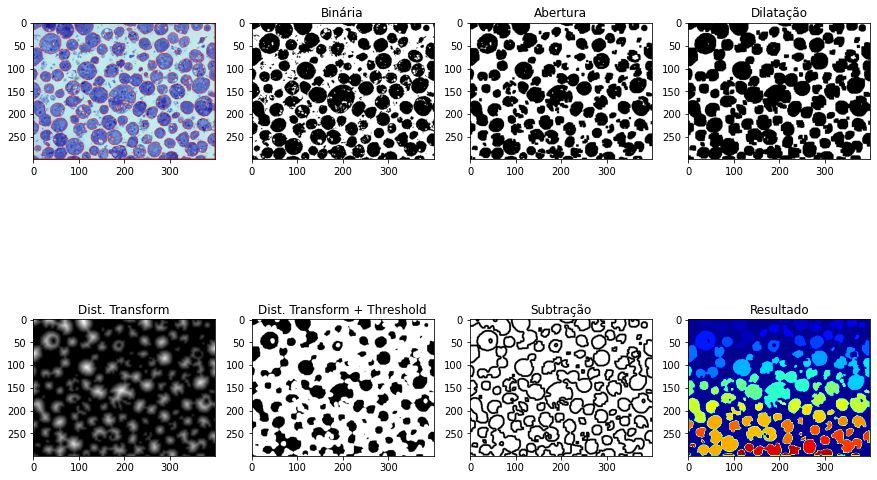

In [177]:
plt.figure(figsize=(15,10))
plt.subplot(241), plt.imshow(exe1_img1)
plt.subplot(242), plt.imshow(exe1_img2,cmap='binary'), plt.title('Binária')
plt.subplot(243), plt.imshow(exe1_img3,cmap='binary'), plt.title('Abertura')
plt.subplot(244), plt.imshow(exe1_img4,cmap='binary'), plt.title('Dilatação')
plt.subplot(245), plt.imshow(exe1_img5,cmap='gray'), plt.title('Dist. Transform')
plt.subplot(246), plt.imshow(exe1_img6,cmap='binary'), plt.title('Dist. Transform + Threshold')
plt.subplot(247), plt.imshow(exe1_img7,cmap='binary'), plt.title('Subtração')
plt.subplot(248), plt.imshow(exe1_img8,cmap='jet'), plt.title('Resultado')
plt.show()

#### Exercício 2

Escolha uma imagem da sua preferência e demonstre o resultado da segmentação por meio da técnica de watershed.

In [178]:
exe2_img1 = cv.imread('data/piece_orange.jpg')
exe2_img1 = cv.cvtColor(exe2_img1, cv.COLOR_BGR2RGB)

In [179]:
# transformar a imagem em preto/branco (binarizar)
exe2_img2 = cv.cvtColor(exe2_img1, cv.COLOR_RGB2GRAY)
th, exe2_img2 = cv.threshold(exe2_img2, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# Morfologia matemática
# Operacao de abertura
# Remove pequenos ruidos da imagem
kernel = np.ones((3, 3), np.uint8)  # Matriz 3x3 preenchida com o valor 1 (um)
exe2_img3 = cv.morphologyEx(exe2_img2, cv.MORPH_OPEN, kernel, iterations=2)

# Operacao de dilatacao
# Preencher pequenos espacos na imagem
exe2_img4 = cv.dilate(exe2_img3, kernel, iterations=1)

exe2_img5 = cv.distanceTransform(exe2_img4, cv.DIST_L2, 5)
th, exe2_img6 = cv.threshold(exe2_img5, 0.30 * exe2_img5.max(), 255, 0)

# Procurar a regiao do watershed
exe2_img6 = np.uint8(exe2_img6)  # Converter a matriz de pixels de inteiros
exe2_img7 = cv.subtract(exe2_img4, exe2_img6)

# Rotular os componentes conectados da imagem
ret, rotulos = cv.connectedComponents(exe2_img6)
rotulos = rotulos + 1

# Marcar a regiao do watershed como o valor zero
rotulos[exe2_img7 == 255] = 0    # Pixels = 255 sao alterados para zero
exe2_img8 = cv.watershed(exe2_img1, rotulos)
exe2_img1[rotulos == -1] = [255, 0, 0]

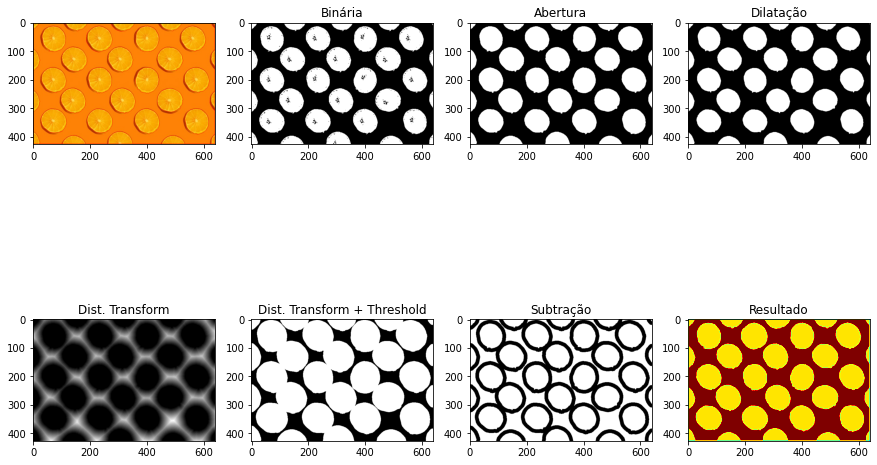

In [180]:
plt.figure(figsize=(15,10))
plt.subplot(241), plt.imshow(exe2_img1)
plt.subplot(242), plt.imshow(exe2_img2,cmap='binary'), plt.title('Binária')
plt.subplot(243), plt.imshow(exe2_img3,cmap='binary'), plt.title('Abertura')
plt.subplot(244), plt.imshow(exe2_img4,cmap='binary'), plt.title('Dilatação')
plt.subplot(245), plt.imshow(exe2_img5,cmap='gray'), plt.title('Dist. Transform')
plt.subplot(246), plt.imshow(exe2_img6,cmap='binary'), plt.title('Dist. Transform + Threshold')
plt.subplot(247), plt.imshow(exe2_img7,cmap='binary'), plt.title('Subtração')
plt.subplot(248), plt.imshow(exe2_img8,cmap='jet'), plt.title('Resultado')
plt.show()